In [7]:
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from ariadne.transformations import ToCylindrical,ConstraintsNormalize
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

***
plot some tracks to check that momentum looks correct (at initial point)
***

In [23]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "./track_plot.png", width=500, height=500)

In [3]:
tsv_file='./output20000.tsv'
data = pd.read_table(tsv_file,sep='\t',header =None,names=['event',  'x', 'y', 'z', 'station',
                              'track', 'px', 'py', 'pz', 'X0', 'Y0', 'Z0'] )
data.head()

,event,x,y,z,station,track,px,py,pz,X0,Y0,Z0
0,0,-191.153936,-190.683436,-121.843107,1,0,-680.524023,-723.110535,88.203382,7.645081,-15.300502,-145.830452
1,0,-197.398845,-197.333112,-121.032794,2,0,-678.981276,-724.559327,88.203382,7.645081,-15.300502,-145.830452
2,0,-203.629782,-203.996315,-120.222453,3,0,-677.435391,-726.004878,88.203382,7.645081,-15.300502,-145.830452
3,0,-209.846726,-210.673024,-119.412083,4,0,-675.886373,-727.447182,88.203382,7.645081,-15.300502,-145.830452
4,0,-216.049655,-217.363217,-118.601683,5,0,-674.334227,-728.886235,88.203382,7.645081,-15.300502,-145.830452


In [5]:
data.tail()


,event,x,y,z,station,track,px,py,pz,X0,Y0,Z0
3431331,19999,-414.619188,351.447223,929.276072,31,7,-55.951544,130.077303,195.283724,2.587052,-0.810711,152.404044
3431332,19999,-418.572565,360.854236,943.348722,32,7,-53.769098,130.994519,195.283724,2.587052,-0.810711,152.404044
3431333,19999,-422.383965,370.366536,957.481359,33,7,-51.562223,131.878797,195.283724,2.587052,-0.810711,152.404044
3431334,19999,-426.050731,379.983467,971.675766,34,7,-49.331073,132.729519,195.283724,2.587052,-0.810711,152.404044
3431335,19999,-429.570147,389.704361,985.933782,35,7,-47.075803,133.546055,195.283724,2.587052,-0.810711,152.404044


***
basic information about the dataset
***

In [6]:
data_ = data.drop(columns=['event','track','station'])
data_['pt'] = np.sqrt(data_['px']**2 + data_['py']**2)
data_.describe().drop(labels=['count'])


,x,y,z,px,py,pz,X0,Y0,Z0,pt
mean,0.395133,0.594039,0.118904,0.572068,1.095814,0.618719,-0.023855,0.114892,0.021879,550.627381
std,307.299986,306.790897,544.470674,431.281534,429.518475,744.376528,9.998707,10.011283,172.513819,259.423995
min,-579.999991,-579.999999,-2385.922206,-999.731693,-999.912772,-8411.116728,-41.300464,-39.981397,-299.965069,100.001679
25%,-274.748154,-274.063370,-280.557986,-298.994291,-296.835743,-264.808767,-6.764016,-6.631328,-148.350578,327.170355
50%,0.579279,1.194979,-0.613309,0.488685,2.039607,-0.088618,0.036375,0.100815,1.813745,551.334361
75%,275.283315,274.782563,278.299943,301.551388,300.725059,264.745870,6.734083,6.963419,148.338250,774.176274
max,579.999999,580.000000,2385.986097,999.696241,999.972948,8955.671491,39.230723,42.148342,299.977708,999.997533


***
distributions of all meaningful variables
***

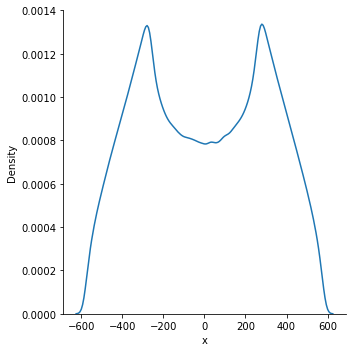

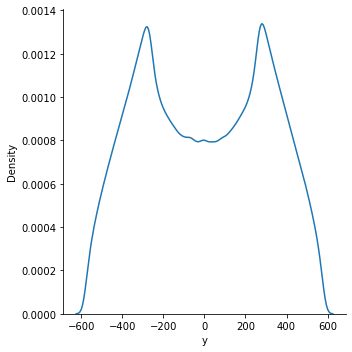

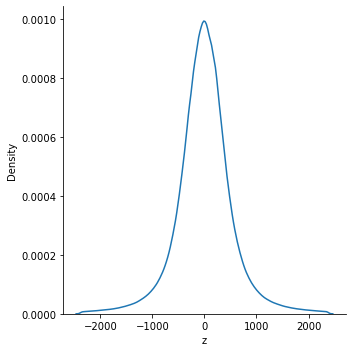

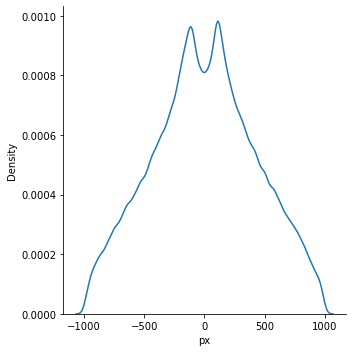

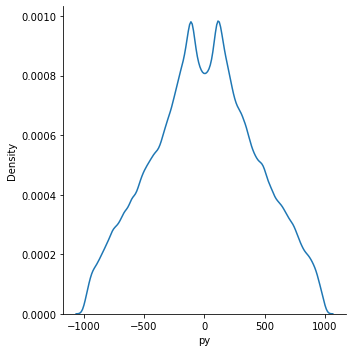

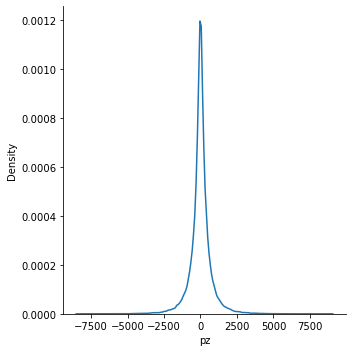

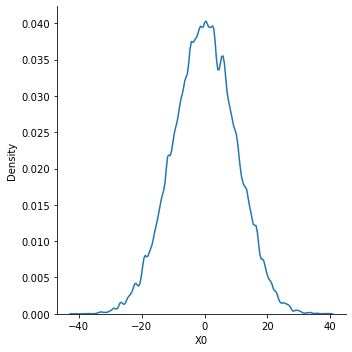

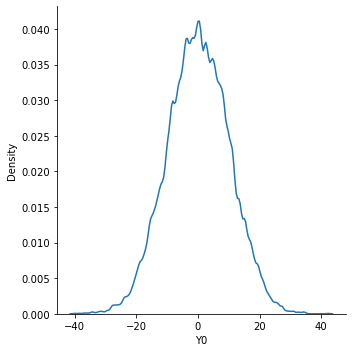

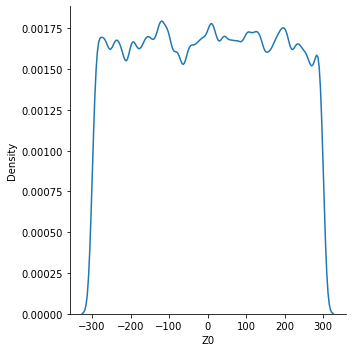

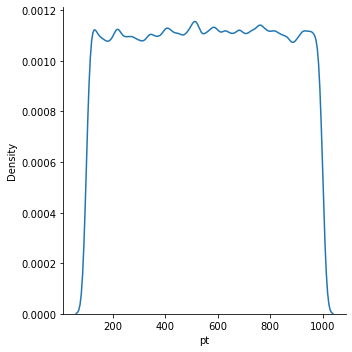

In [7]:
[ sns.displot(data_, x=col_label, kind="kde") for col_label in data_.columns ]

***
correlation between variables
***

<AxesSubplot:>

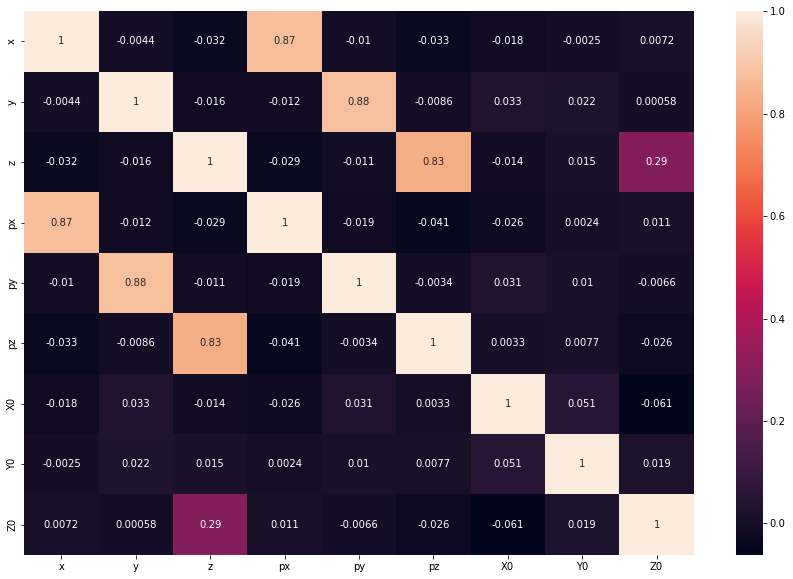

In [13]:
data = pd.read_table('./output1000.tsv',sep='\t',header =None,names=['event',  'x', 'y', 'z', 'station',
                              'track', 'px', 'py', 'pz', 'X0', 'Y0', 'Z0'] )

correlation = data.drop(columns=['event','track','station']).corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

***
identifying node resrtictions (correct values improve performance on test dataset)
***

In [2]:
constraints = {
    'x': [269., 581.], 'y': [-3.15,3.15], 'z': [-2386.0,2386.0]
}
old_col = data.columns
cylindrical = pd.concat ( [data.iloc[:,0], *ToCylindrical().convert( data[['x','y','z']] ),data.loc[:,'station':] ], \
                          axis=1)
cylindrical.columns = old_col

dxdydz = ConstraintsNormalize( constraints=constraints )(cylindrical).groupby('track') \
 .rolling(window=2).apply(np.diff).describe().drop(labels=['count'])
dxdydz.loc[:,'x':'z']

,x,y,z
mean,0.000099,0.000024,-0.000009
std,0.339924,0.144115,0.060004
min,-1.987179,-1.994315,-1.356876
25%,0.058446,-0.000642,-0.002218
50%,0.058446,-0.000340,0.000007
75%,0.058446,0.000633,0.002320
max,0.058446,1.994288,1.367040


## Test set results with threshold of 0.8, node restrictions derived from data 
#### Accuracy:  0.999307 
#### Precision: 0.999392
#### Recall:    0.999914


## Test set results with threshold of 0.8, arbitrary node restrictions
#### Accuracy:  0.990049
#### Precision: 0.981396
#### Recall:    0.997794

***
how many epochs till metrics are stationary
***

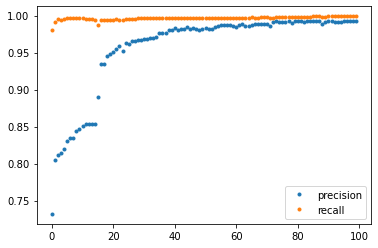

In [1]:
import re

data = [ [],[] ]
with open('train_log.txt') as inp:

    fr = pd.DataFrame ( [ re.split(':',line) for line in re.findall('Epoch [0-9]+:.+',inp.read()) ] )
    for index, row in fr.groupby(fr.iloc[:,0]).tail(1).iterrows():
        res = re.split('=| |,',row[3])
        data[0].append(float ( res[res.index('val_precision_new') + 1] ) )
        data[1].append(float ( res[res.index('val_recall_new')    + 1] ) )

length = len(data[0])

plt.plot( range(length),data[0],  '.',label='precision')
plt.plot( range(length),data[1],  '.',label='recall')
plt.locator_params(axis='y', nbins=10)

plt.legend()
